In [86]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
#for word encoding
import codecs
#regex
import glob
#log events library
import logging
#concurrency
import multiprocessing
#operating system
import os
#pretty pring
import pprint
#regular expressions more granular
import re
#natural language tool kit
import nltk 
#word2vec
import gensim.models.word2vec as w2v
#dimensionality reduction
import sklearn.manifold
#math
import numpy as np
#dataset play
import pandas as pd
#visualization
import seaborn as sns
#plotting
import matplotlib.pyplot as plt
%pylab inline
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [87]:
#process the data-cleaning
#pretrained tokenizer
nltk.download('punkt')
#stopwords like is, was, the, of...no semantic meaning
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/gopalsvs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gopalsvs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
#loading books using glob
book_filenames = sorted(glob.glob("data/*.txt"))
book_filenames

['data/got1.txt',
 'data/got2.txt',
 'data/got3.txt',
 'data/got4.txt',
 'data/got5.txt']

In [89]:
#combine books into one corpus
corpus_raw = u""
for book_filename in book_filenames:
    print("reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} charecters long".format(len(corpus_raw)))

reading 'data/got1.txt'...
Corpus is now 1770659 charecters long
reading 'data/got2.txt'...
Corpus is now 4071041 charecters long
reading 'data/got3.txt'...
Corpus is now 6391405 charecters long
reading 'data/got4.txt'...
Corpus is now 8107945 charecters long
reading 'data/got5.txt'...
Corpus is now 9719485 charecters long


In [90]:
#splittinf into tokens
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
raw_sentences = tokenizer.tokenize(corpus_raw)
raw_sentences

['This edition contains the complete text of the original hardcover edition.',
 'NOT ONE WORD HAS BEEN OMITTED.',
 'A CLASH OF KINGS\n\nA Bantam Spectra Book\n\nPUBLISHING HISTORY\n\nBantam Spectra hardcover edition published February 1999\n\nBantam Spectra paperback edition / September 2000\n\nSPECTRA and the portrayal of a boxed “s” are trademarks of Bantam Books, a division of Random House, Inc.\n\nAll rights reserved.',
 'Copyright © 1999 by George R. R. Martin.',
 'Maps by James Sinclair.',
 'Heraldic crest by Virginia Norey.',
 'Library of Congress Catalog Card Number: 98-37954.',
 'No part of this book may be reproduced or transmitted in any form or by any means, electronic or mechanical, including photocopying, recording, or by any information storage and retrieval system, without permission in writing from the publisher.',
 'Visit our website at www.bantamdell.com\n\nBantam Books, the rooster colophon, Spectra and the portrayal of a boxed “s” are registered trademarks of Rando

In [91]:
#convert into list of words
#remove unnecessary charecters, split into words with no hyphens....stuff like that
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

#each sentence is tokenized and added to sentences list
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))
        
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

Heraldic crest by Virginia Norey.
['Heraldic', 'crest', 'by', 'Virginia', 'Norey']


In [92]:
#count tokens
token_count = sum([len(sentence) for sentence in sentences])
print("no of tokens {0:,}.".format(token_count))

no of tokens 1,818,103.


## Word2Vec

In [113]:
#3 main tasks that vectors help
#Distance, Similarity, Ranking

#more dimensions more computaionally expensive to train
#more dimensions more accurate and more generalised
#Dimensionality of the resulting word vectors
num_features = 300

#minimum word count threshold
min_word_count = 3

#number of threads to run in parallel
#more workers more faster
num_workers = multiprocessing.cpu_count()

#context window length
context_size = 7

#downsample setting for frequent words
#0 - 1e -5 is good
downsampling = 1e-5

#seed for the RNG, to make the results reproducible
#random number generator
#deterministic, good for debugging
seed = 1

GOT2vec = w2v.Word2Vec(
        sg=1,
        seed=seed,
        workers=num_workers,
        size=num_features,
        min_count=min_word_count,
        window=context_size,
        sample=downsampling
)

In [114]:
GOT2vec.build_vocab(sentences)

2020-10-24 00:46:15,396 : INFO : collecting all words and their counts
2020-10-24 00:46:15,397 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-10-24 00:46:15,428 : INFO : PROGRESS: at sentence #10000, processed 140984 words, keeping 10280 word types
2020-10-24 00:46:15,469 : INFO : PROGRESS: at sentence #20000, processed 279730 words, keeping 13558 word types
2020-10-24 00:46:15,511 : INFO : PROGRESS: at sentence #30000, processed 420336 words, keeping 16598 word types
2020-10-24 00:46:15,542 : INFO : PROGRESS: at sentence #40000, processed 556581 words, keeping 18324 word types
2020-10-24 00:46:15,571 : INFO : PROGRESS: at sentence #50000, processed 686247 words, keeping 19714 word types
2020-10-24 00:46:15,608 : INFO : PROGRESS: at sentence #60000, processed 828497 words, keeping 21672 word types
2020-10-24 00:46:15,649 : INFO : PROGRESS: at sentence #70000, processed 973830 words, keeping 23093 word types
2020-10-24 00:46:15,684 : INFO : PROGRESS: at 

In [115]:
print("Word2Vec vocabulary length:", len(GOT2vec.wv.vocab))

Word2Vec vocabulary length: 17277


In [116]:
GOT2vec.train(sentences,epochs = 1,total_examples = 1)

2020-10-24 00:46:20,227 : INFO : training model with 8 workers on 17277 vocabulary and 300 features, using sg=1 hs=0 sample=1e-05 negative=5 window=7
2020-10-24 00:46:21,240 : INFO : EPOCH 1 - PROGRESS: at 8986300.00% examples, 306983 words/s, in_qsize 13, out_qsize 2
2020-10-24 00:46:21,576 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-10-24 00:46:21,587 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-10-24 00:46:21,590 : INFO : worker thread finished; awaiting finish of 5 more threads
2020-10-24 00:46:21,594 : INFO : worker thread finished; awaiting finish of 4 more threads
2020-10-24 00:46:21,607 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-10-24 00:46:21,610 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-10-24 00:46:21,612 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-10-24 00:46:21,634 : INFO : worker thread finished; awaiting finish of 0 more threads
202

(442551, 1818103)

In [117]:
if not os.path.exists("trained"):
    os.makedirs("trained")

#saving the model
GOT2vec.save(os.path.join("trained", "GOT2vec.w2v"))

2020-10-24 00:46:22,476 : INFO : saving Word2Vec object under trained/GOT2vec.w2v, separately None
2020-10-24 00:46:22,478 : INFO : not storing attribute vectors_norm
2020-10-24 00:46:22,479 : INFO : not storing attribute cum_table
2020-10-24 00:46:22,997 : INFO : saved trained/GOT2vec.w2v


In [118]:
#load model
GOT2vec = w2v.Word2Vec.load(os.path.join("trained", "GOT2vec.w2v"))

2020-10-24 00:46:23,604 : INFO : loading Word2Vec object from trained/GOT2vec.w2v
2020-10-24 00:46:23,981 : INFO : loading wv recursively from trained/GOT2vec.w2v.wv.* with mmap=None
2020-10-24 00:46:23,982 : INFO : setting ignored attribute vectors_norm to None
2020-10-24 00:46:23,983 : INFO : loading vocabulary recursively from trained/GOT2vec.w2v.vocabulary.* with mmap=None
2020-10-24 00:46:23,984 : INFO : loading trainables recursively from trained/GOT2vec.w2v.trainables.* with mmap=None
2020-10-24 00:46:23,985 : INFO : setting ignored attribute cum_table to None
2020-10-24 00:46:23,986 : INFO : loaded trained/GOT2vec.w2v


In [131]:
#Compress the word vectors into 2D space and plot them
tsne = sklearn.manifold.TSNE(n_components = 2, random_state = 42)

In [132]:
all_words_vectors_matrix = GOT2vec.wv.syn0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


### Training t-sne

In [133]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_words_vectors_matrix)

### Plotting

In [134]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[GOT2vec.wv.vocab[word].index])
            for word in GOT2vec.wv.vocab
            ]
    ],
    columns = ["word", "x", "y"]
)
points.head(10)

,word,x,y
0,This,30.481268,3.952017
1,edition,4.592237,0.359067
2,the,-10.596866,-3.023787
3,complete,28.325485,7.562538
4,of,0.087943,4.625450
5,original,-18.868042,14.171934
6,hardcover,-5.470445,15.459691
7,ONE,18.334417,-14.896327
8,A,-14.221101,-13.384837
9,OF,14.602567,7.107610


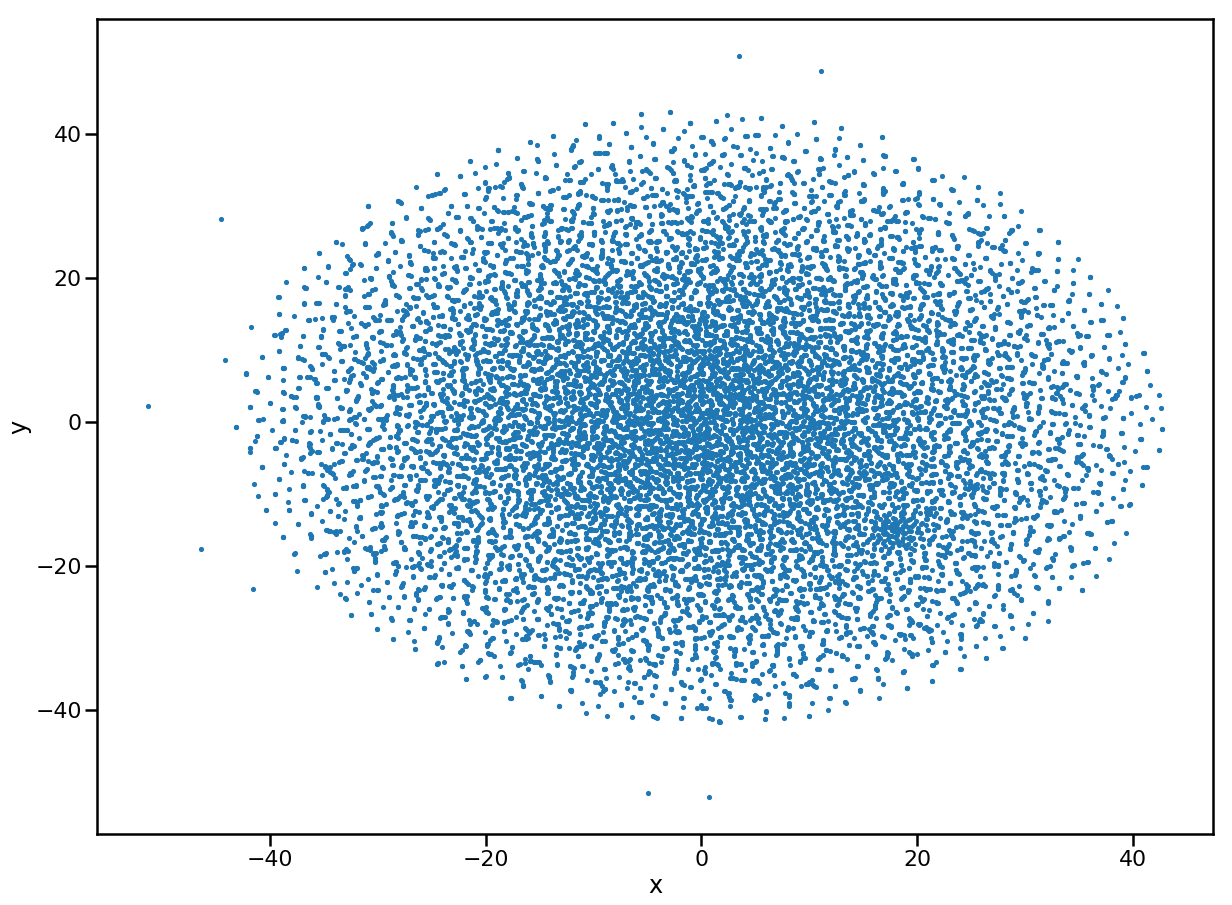

In [135]:
sns.set_context("poster")
points.plot.scatter("x", "y", s = 10, figsize = (20,15))

In [136]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

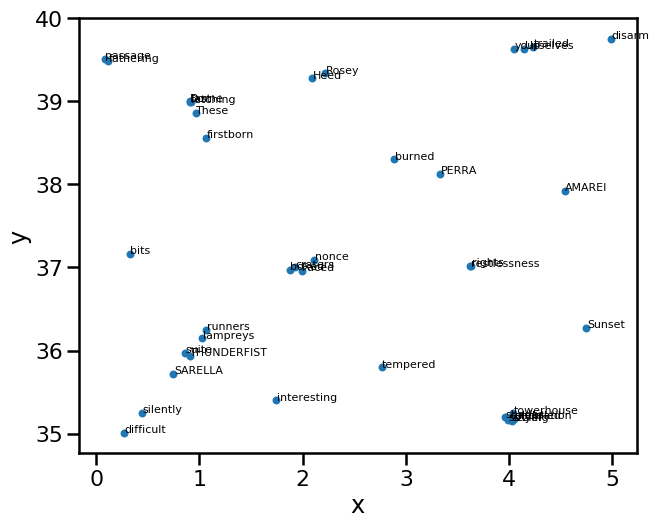

In [137]:
plot_region(x_bounds=(0, 5), y_bounds=(35, 40))

In [138]:
GOT2vec.most_similar("Stark")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Whoever', 0.23689019680023193),
 ('sizes', 0.22359278798103333),
 ('Water', 0.22037512063980103),
 ('Might', 0.2129242718219757),
 ('Khal', 0.20866921544075012),
 ('treasures', 0.20602810382843018),
 ('decides', 0.20223373174667358),
 ('dragonslayers', 0.19813653826713562),
 ('sputter', 0.19536972045898438),
 ('Septon', 0.19402728974819183)]

In [139]:
GOT2vec.most_similar("Aerys")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Oswald', 0.22591619193553925),
 ('faithless', 0.20659546554088593),
 ('feint', 0.20130959153175354),
 ('straddled', 0.1932430863380432),
 ('marries', 0.19277681410312653),
 ('save', 0.1923164576292038),
 ('swam', 0.190712109208107),
 ('Lewyn', 0.18627309799194336),
 ('leech', 0.1839093565940857),
 ('Lysa', 0.18383494019508362)]

In [140]:
GOT2vec.most_similar("direwolf")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Lewys', 0.21977569162845612),
 ('Flint', 0.21346113085746765),
 ('sparingly', 0.20028084516525269),
 ('gentle', 0.1989654302597046),
 ('sicken', 0.19856244325637817),
 ('gains', 0.19642359018325806),
 ('faces', 0.1887485682964325),
 ('broke', 0.18842723965644836),
 ('peacocks', 0.18606528639793396),
 ('nigh', 0.18551874160766602)]

In [141]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = GOT2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [142]:
nearest_similarity_cosmul("Stark", "Winterfell", "Riverrun")
nearest_similarity_cosmul("Jaime", "sword", "wine")
nearest_similarity_cosmul("Arya", "Nymeria", "dragons")

Stark is related to Winterfell, as lacking is related to Riverrun
Jaime is related to sword, as guess is related to wine
Arya is related to Nymeria, as expected is related to dragons


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'expected'